In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import json
from tqdm import tqdm_notebook as tqdm
import matplotlib.patches as patches
import collections
from random import randint
import random
from IPython.display import Image

In [2]:
Image(url= "flip_cube.jpg", width=300, height=300)

In [3]:
colors = {'g': 'green',
          'b': 'blue',
          'y': 'yellow',
          'p': 'purple',
          's': 'grey',
          'o': 'orange',
          'w': 'white',
          'r': 'red'  
        }

In [4]:
diskColors = ["g", "b"]
sideColors = ["y", "p", "s", "o", "w", "r"]

In [5]:
pieces =  it.chain.from_iterable(zip(diskColors,[x,x]) for x in sideColors)  

In [6]:
config = it.permutations(pieces)

In [7]:
target = [('g', 'y'),
 ('g', 'p'),
 ('g', 'r'),
 ('g', 'w'),
 ('g', 's'),
 ('g', 'o'),
 ('b', 'y'),
 ('b', 'p'),
 ('b', 'r'),
 ('b', 'w'),
 ('b', 's'),
 ('b', 'o')]

In [8]:
start = list(next(config)) 

In [9]:
def decomposition(lst):
    tt = [a[0] for a in lst][0:6]  
    mt = [a[1] for a in lst][0:6]
    mb = [a[1] for a in lst][6:12]
    bb = [a[0] for a in lst][6:12] 
    return (tt, mt, mb, bb)  

In [10]:
def shearRot(ls):
    lst = ls*1
    lst[0],lst[1],lst[2],lst[6],lst[7],lst[8] = lst[8],lst[7],lst[6], lst[2], lst[1], lst[0]
    return lst

In [11]:
def totalRot(lst,n):
    t, b = lst[0:6], lst[6:12]
    t, b = collections.deque(t), collections.deque(b)
    t.rotate(n)
    b.rotate(n)
    return list(t+b)

In [12]:
def topRot(lst,n):
    t, b = lst[0:6], lst[6:12]
    t, b = collections.deque(t), collections.deque(b)
    t.rotate(n)
    b.rotate(0)
    return list(t+b)

In [13]:
def bottRot(lst,n):
    t, b = lst[0:6], lst[6:12]
    t, b = collections.deque(t), collections.deque(b)
    t.rotate(0)
    b.rotate(n)
    return list(t+b)

In [14]:
def sphere(cf):
    sph = []
    sph.append(shearRot(cf))
    for n in [1,2,3,4,5]:
        tR, bR = topRot(cf,n), bottRot(cf,n)
        sph.append(tR)
        sph.append(bR)
        sph.append(shearRot(tR))
        sph.append(shearRot(bR))
    return sph   

In [15]:
def next_step(cf):
    sph = sphere(cf)
    n = len(sph)
    p = randint(0, n-1) 
    return sph[p]

In [16]:
def drunk_walking(n):
    trace = []
    z = start
    for i in range(n):
        nz = next_step(z)
        trace.append(nz)
        z = nz
    return trace

In [17]:
def showConfig(lst):
    ax1=plt.subplot(111,aspect='equal')
    tt, mt, mb, bb = decomposition(lst)
    ls = tt + mt + mb + bb
    dx, dy = 1/6, 1/4
    pieces = []
    for j in range(24):
        x, cnt = (j%6)/6, j//6+1
        color = colors[ls[j]]
        p = patches.Rectangle(
                    (x,1-cnt/4), dx,dy, edgecolor="white", facecolor=color, fill=True,linewidth=0.5 )
        pieces.append(p)
    
    for p in pieces: ax1.add_patch(p)
    plt.axis('off')
    plt.show()   

In [18]:
def equiv_class(lst):
    ec = []
    for n in range(6):
        ec.append(totalRot(lst,n))
    t, b = lst[6:12], lst[0:6]
    for n in range(6):
        ec.append(totalRot(t+b,n))
    return ec

In [19]:
def dist_help(x,y):
    d = 0
    for n in range(12):
        if x[n] != y[n]: d= d+1
    return d


In [20]:
def dist(x,y):
    EC = equiv_class(y) 
    dt = [dist_help(x,z) for z in EC]
    return min(dt)

In [26]:
random.seed(1)

In [27]:
trace = drunk_walking(10000000)
distances = [dist(cf, target) for cf in trace]
mn = distances.index(min(distances))
min(distances)

0

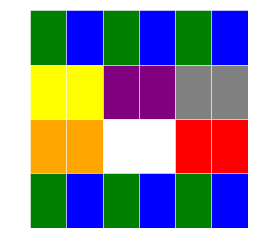

In [28]:
showConfig(start)

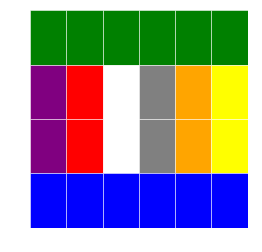

In [29]:
showConfig(trace[mn])